In [1]:
import os

import numpy as np
from scipy.stats import sem
import importlib
import seaborn as sns
import gymnasium as gym
import matplotlib.pyplot as plt

import gym_env
from models import SR_IS, SR_TD
from utils import get_full_maze_values, policy_reval, decision_policy, decision_policy_SR, update_terminal_reward, update_terminal_reward_SR
from utils_render import plot_decision_prob

In [2]:
# Set the random seed for NumPy
seed = 1
np.random.seed(seed)

# Save dir
save_dir = os.path.join('..', 'figures/')

# For plotting
idx = 4
prob_locs = [3, 5]
colors = [1, 9]

In [3]:
# Model Hyperparams
reward = -0.1
terminal_reward = 10
alpha = 0.05
beta = 1.0
_lambda = 1.0
num_steps = 12000
num_iterations = 120

## SR-IS

In [4]:
prob_train, prob_test = [[],[]], [[], []]

for i in range(num_iterations):
    # Agent
    agent = SR_IS(env_name="tolman-latent", reward=reward, term_reward=terminal_reward, _lambda=_lambda, beta=beta, alpha=alpha, num_steps=num_steps, policy="softmax", imp_samp=True)
    agent.learn(seed=i)

    # Old policy
    pii_old = decision_policy(agent, agent.Z)
    prob_train[0].append(pii_old[4][3])
    prob_train[1].append(pii_old[4][5])

    # Make the reward for the first terminal state negative and recalculate policy
    update_terminal_reward(agent, loc=0, r=-5)
    V_new, Z_new = policy_reval(agent)

    # New policy
    pii_new = decision_policy(agent, Z_new)
    prob_test[0].append(pii_new[4][3])
    prob_test[1].append(pii_new[4][5])

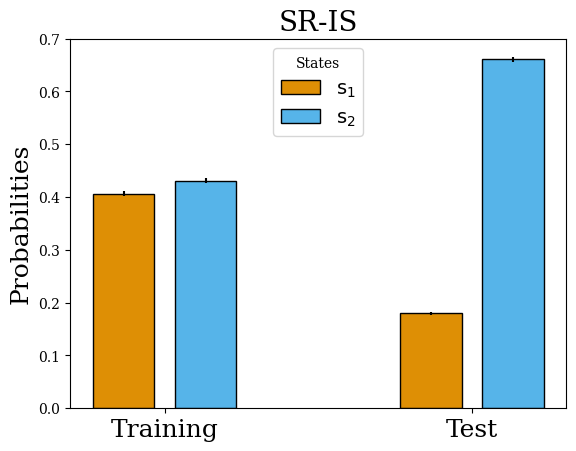

In [ ]:
# Plot
prob_train_mean = [np.mean(prob_train[0]), np.mean(prob_train[1])]
prob_test_mean = [np.mean(prob_test[0]), np.mean(prob_test[1])]
std_train = [sem(prob_train[0]), sem(prob_test[1])]
std_test = [sem(prob_test[0]), sem(prob_test[1])]
save_path = save_dir + "latent_SR-IS.png"
plot_decision_prob(
    probs_train=prob_train_mean,
    probs_test=prob_test_mean,
    colors=colors,
    title='SR-IS',
    ylabel="Probabilities",
    leg_loc="upper center",
    save_path=save_path,
    std=[std_train, std_test]
)

## SR

In [ ]:
prob_train, prob_test = [[],[]], [[], []]

for i in range(num_iterations):
    # Agent
    agent = SR_TD(env_name="tolman-latent", gamma=0.9, reward=0,  term_reward=terminal_reward, beta=beta, alpha=alpha, num_steps=num_steps, policy="softmax")
    agent.learn(seed=i)

    # Old policy
    pii_old = decision_policy_SR(agent)
    prob_train[0].append(pii_old[4][3])
    prob_train[1].append(pii_old[4][5])

    # Make the reward for the first terminal state negative and recalculate policy
    update_terminal_reward_SR(agent, loc=0, r=-5)
    agent.update_V()
    V_new = agent.V

    # New policy
    pii_new = decision_policy_SR(agent)
    prob_test[0].append(pii_new[4][3])
    prob_test[1].append(pii_new[4][5])

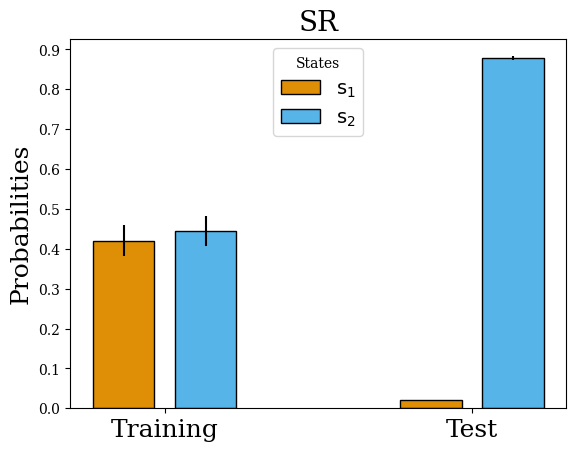

In [ ]:
# Plot
prob_train_mean = [np.mean(prob_train[0]), np.mean(prob_train[1])]
prob_test_mean = [np.mean(prob_test[0]), np.mean(prob_test[1])]
std_train = [sem(prob_train[0]), sem(prob_train[1])]
std_test = [sem(prob_test[0]), sem(prob_test[1])]
save_path = save_dir + "latent_SR.png"
plot_decision_prob(
    probs_train=prob_train_mean,
    probs_test=prob_test_mean,
    colors=colors,
    title='SR',
    ylabel="Probabilities",
    leg_loc="upper center",
    save_path=save_path,
    std=[std_train, std_test]
)